# GreekStockPortfolio



### 3. Clustering

---

In [ ]:
def clustering(returns):
    """
    Performs clustering of stocks based on their volatility and returns using KMeans,
    and then compares these clusters with sector information.

    This function calculates the volatility and mean returns of each stock, applies KMeans clustering,
    and visualizes the results. It also retrieves sector information for each stock and compares
    clustering results based on financial metrics with those based on sector information.

    Parameters:
    returns (pd.DataFrame): A DataFrame where each row represents a stock and columns represent return periods.

    Returns:
    pd.DataFrame: A DataFrame with added columns for cluster assignments and sector information.
    """

    # Create a DataFrame to hold volatility and returns for each stock
    df = pd.DataFrame()
    df['Volatility'] = returns.std()  # Calculate the standard deviation (volatility) of returns
    df['Returns'] = returns.mean()     # Calculate the mean returns for each stock
    print(df)

    # Prepare the data for KMeans clustering
    data = np.asarray([np.asarray(df['Returns']), np.asarray(df['Volatility'])]).T
    inertia = []

    # Use the elbow method to determine the optimal number of clusters for KMeans
    for i in range(1, 20):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)  # Append the inertia for each number of clusters

    # Plot the elbow curve to visualize the optimal number of clusters
    plt.figure(figsize=(20, 10))
    plt.plot(inertia, 'bx-')
    plt.grid(True)
    plt.title('Elbow Curve for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia (Within-cluster Sum of Squares)')
    plt.show()
    print(inertia)  # Display inertia values alongside the elbow graph for a comprehensive review.

    time.sleep(2)
    # Get user input for the number of clusters based on the elbow curve
    n = input('Based on the Elbow Curve, provide the number of clusters: ')
    n = int(n)
    k = n
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    # Print the inertia and cluster centers for the chosen number of clusters
    print(f"Inertia for k={k} is {kmeans.inertia_}")
    print("\nCluster centers:\n", kmeans.cluster_centers_)

    # Assign cluster labels to the DataFrame and prepare it for plotting
    y = kmeans.labels_
    print("Cluster labels: ", y)
    y = pd.Series(y, index=df.index)
    df['Cluster'] = y
    df = df.reset_index()
    df = df.rename(columns={'index': 'Ticker'})
    print(df)  # Print the DataFrame with cluster assignments

    # Plot the clusters using Plotly
    fig = px.scatter(df, x="Volatility", y="Returns", color="Cluster", hover_data=["Ticker"], title='Clusters Based on Financial Metrics')
    fig.update(layout_coloraxis_showscale=False)
    fig.show()

    # Retrieve sector information for each stock
    import yfinance as yf
    sec = []
    for i in df['Ticker']:
        stock = yf.Ticker(i)
        sec.append(stock.info['sector'])
    df['Sector'] = pd.Series(sec)  # Add sector information to the DataFrame

    # Plot the clusters with sector information using Plotly
    fig = px.scatter(df, x="Volatility", y="Returns", color="Sector", hover_data=["Ticker"], title='Clusters Based on Sectors')
    fig.update(layout_coloraxis_showscale=False)
    fig.show()

    return df


             Volatility   Returns
Ticker                           
ADMIE.AT       0.019513  0.000271
AEGN.AT        0.028841  0.000428
ALPHA.AT       0.036142 -0.000135
AVAX.AT        0.032096  0.001341
BELA.AT        0.022772  0.000526
CENER.AT       0.028240  0.001320
EEE.AT         0.020478 -0.000118
ELHA.AT        0.024278  0.000406
ELLAKTOR.AT    0.032991  0.000340
ELPE.AT        0.020183  0.000132
ETE.AT         0.036319  0.000676
EUROB.AT       0.033269  0.000517
EXAE.AT        0.021449  0.000113
EYAPS.AT       0.015660 -0.000182
EYDAP.AT       0.017920  0.000182
FOYRK.AT       0.021230 -0.000184
GEKTERNA.AT    0.025170  0.000793
HTO.AT         0.017339  0.000195
INKAT.AT       0.031567  0.000880
INLOT.AT       0.046053 -0.000139
INTEK.AT       0.032511  0.001568
INTRK.AT       0.032121  0.000622
KRI.AT         0.018568  0.000569
LAMDA.AT       0.022001  0.000130
LAVI.AT        0.051958  0.000375
MOH.AT         0.024373  0.000181
MYTIL.AT       0.021312  0.001168
OLTH.AT       

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

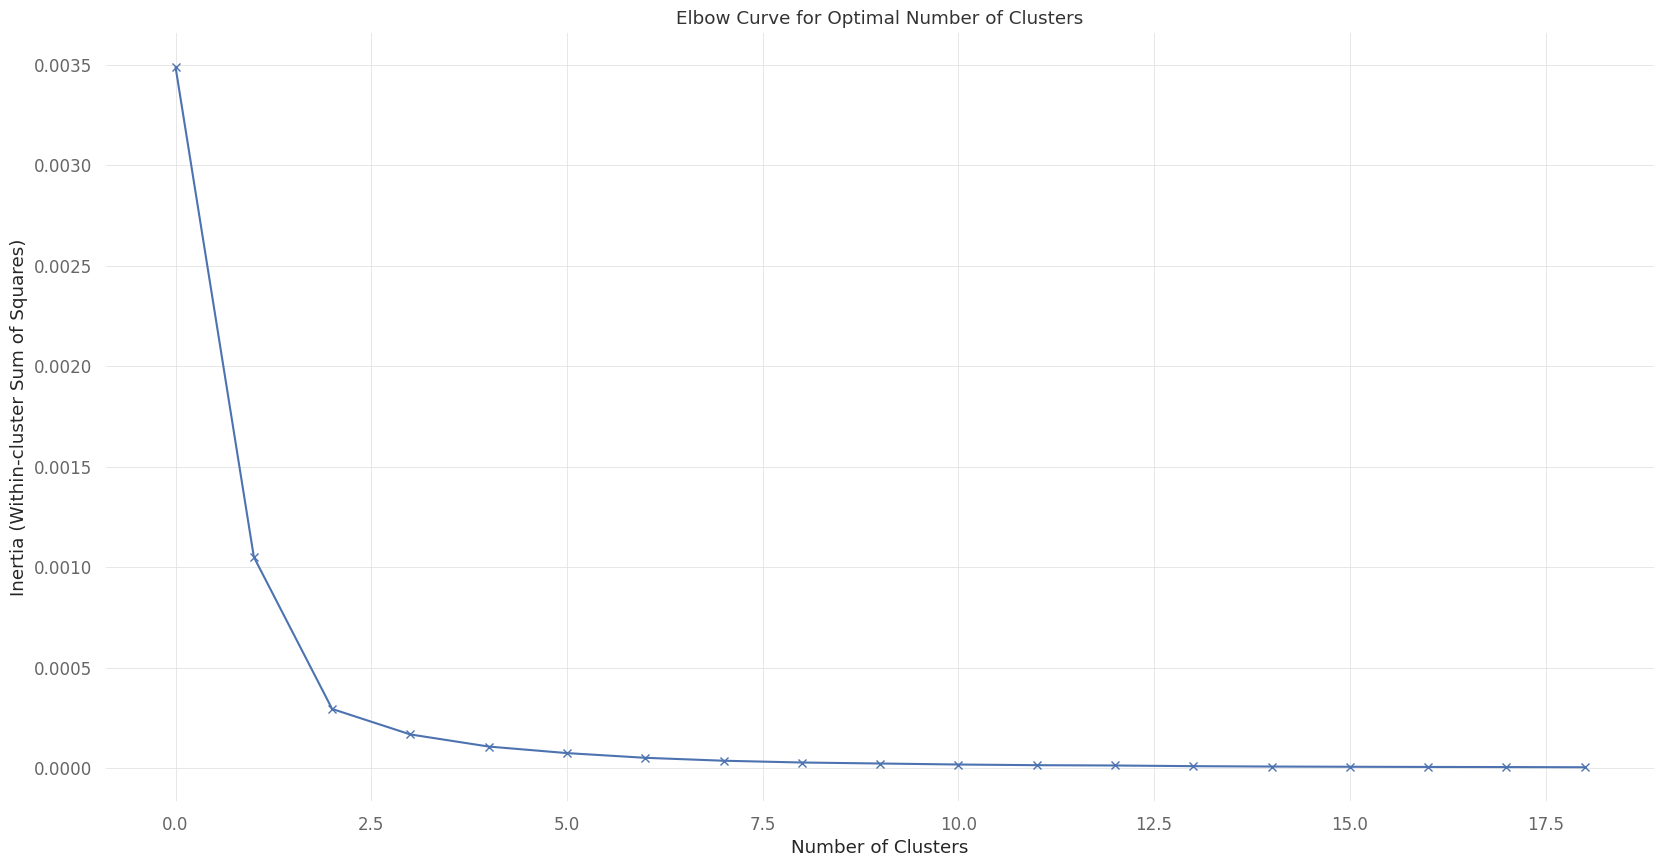

[0.0034879460881409117, 0.001050968055531687, 0.0002948766937380261, 0.00016800970023203655, 0.0001078052889409658, 7.527875705051605e-05, 5.184155968309963e-05, 3.7292466737900446e-05, 2.845374921000903e-05, 2.3487769003281888e-05, 1.8471423623311224e-05, 1.5155186188254855e-05, 1.3577227870755448e-05, 1.0260990435699077e-05, 8.324902967044796e-06, 7.256505259523509e-06, 6.390358284768335e-06, 5.770990433846921e-06, 4.852548548528689e-06]
Based on the Elbow Curve, provide the number of clusters: 5
Inertia for k=5 is 0.0001078052889409658

Cluster centers:
 [[ 0.00025036  0.01765918]
 [ 0.00079972  0.03325831]
 [-0.00026525  0.04871689]
 [ 0.00045956  0.02213506]
 [ 0.00078559  0.02738897]]
Cluster labels:  [0 4 1 1 3 4 3 3 1 3 1 1 3 0 0 3 4 0 1 2 1 1 0 3 2 3 3 0 3 3 0 3 0 1 2 3 3
 3 0 2 4]
         Ticker  Volatility   Returns  Cluster
0      ADMIE.AT    0.019513  0.000271        0
1       AEGN.AT    0.028841  0.000428        4
2      ALPHA.AT    0.036142 -0.000135        1
3       AV

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df_clusters=clustering(returns)